# Goldspot Discoveries Analysis

In [62]:
#Usual imports needed
import datetime
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from api_quandl import api

### Gold Price dataset

In [63]:
#Pulled from www.quandl.com/data/LBMA/GOLD-Gold-Price-London-Fixing
gold_data = quandl.get('LBMA/GOLD', 
                       start_date='1999-06-01', 
                       end_date='2019-06-01',
                       paginate=True)

In [64]:
gold_data.tail()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2019-05-24,1281.50,1282.50,1011.36,1011.89,1145.92,1145.40
2019-05-28,1283.90,1278.30,1012.87,1008.20,1146.91,1142.29
2019-05-29,1283.50,1281.65,1016.02,1013.27,1151.04,1150.67
2019-05-30,1276.45,1280.95,1010.44,1015.92,1146.25,1151.70
2019-05-31,1296.00,1295.55,1029.28,1028.80,1162.12,1161.07


In [65]:
#Limit data to just end of data price of gold for US
gold_data = gold_data[['USD (PM)']]
gold_data.rename(columns={'USD (PM)': 'gold_price'}, inplace=True)
gold_data.head()

,gold_price
Date,
1999-06-01,266.85
1999-06-02,267.15
1999-06-03,264.75
1999-06-04,265.30
1999-06-07,265.60


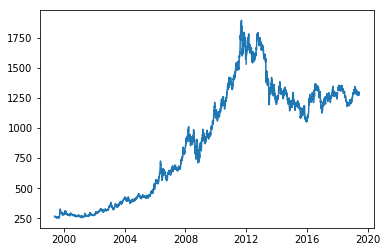

In [66]:
plt.plot(gold_data)
plt.show()

### GDP dataset

In [67]:
#Pulled from www.quandl.com/data/FRED/GDP-Gross-Domestic-Product
gdp_data = quandl.get('FRED/GDP', 
                       start_date='1999-06-01', 
                       end_date='2019-06-01',
                       paginate=True)

In [68]:
gdp_data.head()

,Value
Date,
1999-07-01,9681.856
1999-10-01,9899.378
2000-01-01,10002.857
2000-04-01,10247.679
2000-07-01,10319.825


In [69]:
gdp_data.rename(columns={'Value': 'gdp'}, inplace=True)
gdp_data.head()

,gdp
Date,
1999-07-01,9681.856
1999-10-01,9899.378
2000-01-01,10002.857
2000-04-01,10247.679
2000-07-01,10319.825


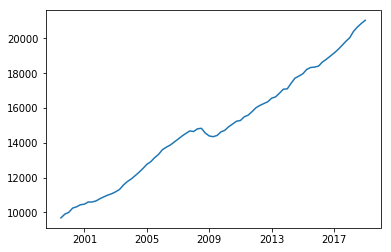

In [70]:
plt.plot(gdp_data)
plt.show()

### Unemployment dataset

In [71]:
#Pulled from: www.quandl.com/data/USMISERY/INDEX-United-States-Misery-Index
unemploy_data = quandl.get('USMISERY/INDEX', 
                       start_date='1999-06-01', 
                       end_date='2019-06-01',
                       paginate=True)

In [72]:
unemploy_data.columns

Index(['Unemployment Rate', 'Inflation Rate', 'Misery Index'], dtype='object')

In [73]:
unemploy_data.tail()

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
2018-12-31,3.9,1.91,5.81
2019-01-31,4.0,1.55,5.55
2019-02-28,3.8,1.52,5.32
2019-03-31,3.8,1.86,5.66
2019-04-30,3.6,2.00,5.60


In [74]:
unemploy_data.rename(columns={'Unemployment Rate': 'unemploy_rate'}, inplace=True)
unemploy_data.head()

,unemploy_rate,Inflation Rate,Misery Index
Date,,,
1999-06-30,4.3,1.96,6.26
1999-07-31,4.3,2.14,6.44
1999-08-31,4.2,2.26,6.46
1999-09-30,4.2,2.63,6.83
1999-10-31,4.1,2.56,6.66


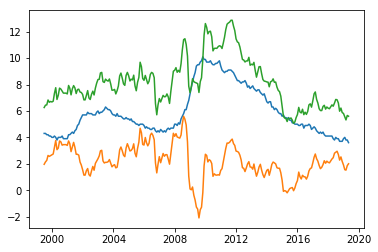

In [75]:
plt.plot(unemploy_data)
plt.show()

In [76]:
#Isolate only the unmployment rate number
unemploy_data = unemploy_data[['unemploy_rate']]
unemploy_data.head()

,unemploy_rate
Date,
1999-06-30,4.3
1999-07-31,4.3
1999-08-31,4.2
1999-09-30,4.2
1999-10-31,4.1


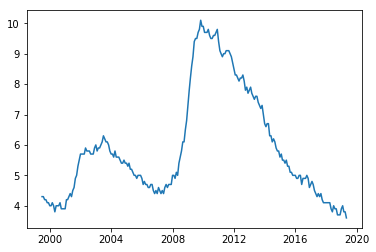

In [77]:
plt.plot(unemploy_data)
plt.show()

### Oil Price dataset

In [78]:
#Pulled from: www.quandl.com/data/OPEC/ORB-OPEC-Crude-Oil-Price
oil_data = quandl.get('OPEC/ORB', 
                       start_date='1999-06-01', 
                       end_date='2019-06-01',
                       paginate=True)

In [79]:
oil_data.head()

,Value
Date,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86


In [80]:
oil_data.rename(columns={'Value': 'oil_price'}, inplace=True)
oil_data.head()

,oil_price
Date,
2003-01-02,30.05
2003-01-03,30.83
2003-01-06,30.71
2003-01-07,29.72
2003-01-08,28.86


In [81]:
oil_data.columns

Index(['oil_price'], dtype='object')

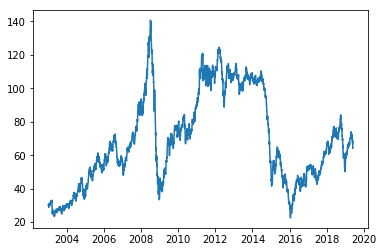

In [82]:
plt.plot(oil_data)
plt.show()

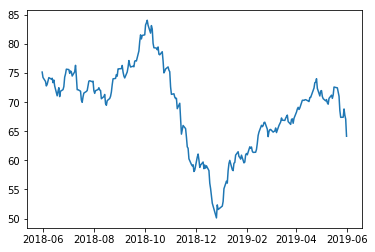

In [83]:
#Only show the last year to match datasource given by Goldspot
plt.plot(oil_data.loc['2018-05-31':])
plt.show()

Note, the data pulled from the API is a larger dataset then the one I pulled from the URL provided for gold data, which shows it is the same data

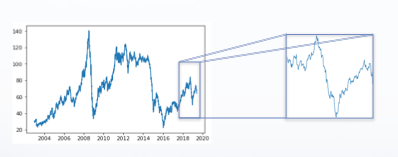

## Merge Datasets

In [84]:
#Check the date separation for each dataset
dataset_list = [gold_data, gdp_data, unemploy_data, oil_data]

for i in dataset_list:
    print(i.head())
    print('Rows in this dataset: {}'.format(len(i)))
    print('\n')

            gold_price
Date                  
1999-06-01      266.85
1999-06-02      267.15
1999-06-03      264.75
1999-06-04      265.30
1999-06-07      265.60
Rows in this dataset: 5055


                  gdp
Date                 
1999-07-01   9681.856
1999-10-01   9899.378
2000-01-01  10002.857
2000-04-01  10247.679
2000-07-01  10319.825
Rows in this dataset: 79


            unemploy_rate
Date                     
1999-06-30            4.3
1999-07-31            4.3
1999-08-31            4.2
1999-09-30            4.2
1999-10-31            4.1
Rows in this dataset: 239


            oil_price
Date                 
2003-01-02      30.05
2003-01-03      30.83
2003-01-06      30.71
2003-01-07      29.72
2003-01-08      28.86
Rows in this dataset: 4234




Merge datasets using 'Outer' joins

In [85]:
all_datasets = gold_data.join(oil_data, how='outer')
all_datasets = all_datasets.join(gdp_data, how='outer')
all_datasets = all_datasets.join(unemploy_data, how='outer')

In [86]:
all_datasets

,gold_price,oil_price,gdp,unemploy_rate
Date,,,,
1999-06-01,266.85,NaN,NaN,NaN
1999-06-02,267.15,NaN,NaN,NaN
1999-06-03,264.75,NaN,NaN,NaN
1999-06-04,265.30,NaN,NaN,NaN
1999-06-07,265.60,NaN,NaN,NaN
1999-06-08,262.35,NaN,NaN,NaN
1999-06-09,261.30,NaN,NaN,NaN
1999-06-10,258.60,NaN,NaN,NaN
1999-06-11,259.70,NaN,NaN,NaN


We lose a lot of perspective when we plot all lines on the same chart.

In [93]:
all_datasets.columns

Index(['gold_price', 'oil_price', 'gdp', 'unemploy_rate'], dtype='object')

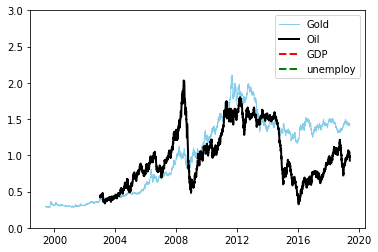

In [94]:
import warnings
warnings.filterwarnings("ignore")

#Multiple line plot after normalizing the data for each column

# Data normalized
df=pd.DataFrame({'x': all_datasets.index, 
                 'y1': all_datasets['gold_price']/all_datasets['gold_price'].mean(), 
                 'y2': all_datasets['oil_price']/all_datasets['oil_price'].mean(),
                 'y3': all_datasets['gdp']/all_datasets['gdp'].mean(), 
                 'y4': all_datasets['unemploy_rate']/all_datasets['unemploy_rate'].mean(), })

# multiple line plot parameters
plt.plot( 'x', 'y1', data=df, marker='', color='skyblue', linewidth=1,label="Gold")
plt.plot( 'x', 'y2', data=df, marker='', color='black', linewidth=2, label="Oil")
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="GDP")
plt.plot( 'x', 'y4', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label="unemploy")

plt.ylim((0, 3))
plt.legend()
plt.show()

The data seems to have alot of NA's due to the different time durations, especially from monthly(Unemployment) and quarterly (GDP)

Need to know before cleaning how the data will be used and viewed. Will it be used in a machine learning supervised method or will it be viewed visually, ie. something similar to stacking the graphs on top of each other.

## Dealing with Time Series

Let's resample the time series data on a 'quarterly' bases.

In [95]:
oil_data_q = pd.DataFrame(oil_data['oil_price'].resample('Q').max())
oil_data_q.head()

,oil_price
Date,
2003-03-31,33.11
2003-06-30,27.86
2003-09-30,29.22
2003-12-31,30.73
2004-03-31,33.03


Note, the choosen to represent this aggregation is the last day of the particular month but this might not mesh with other 'quarterly' datasources, ie. 'GDP'

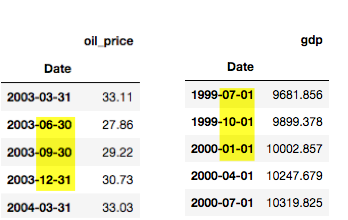

Will need to discuss:

- The time resampling rate before proceeding
- What interval is needed for analysis downstream
- How to handle missing values